In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



In [230]:
# Assuming your preprocessed dataset is saved as 'data.csv'
df = pd.read_csv("final_data.csv")
df['Needs_Treatment'] = ((df['Stress_Level'] > 3) | 
                        (df['Depression_Score'] > 3) | 
                        (df['Anxiety_Score'] > 3)).astype(int)


In [231]:
X = df.drop("Needs_Treatment", axis=1)
y = df["Needs_Treatment"]

In [232]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [233]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [234]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)


,n_neighbors,19
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [235]:
y_pred = knn.predict(X_test)


In [236]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7902995720399429

Confusion Matrix:
 [[327 222]
 [ 72 781]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       549
           1       0.78      0.92      0.84       853

    accuracy                           0.79      1402
   macro avg       0.80      0.76      0.77      1402
weighted avg       0.79      0.79      0.78      1402



In [237]:
from sklearn.metrics import precision_score

k_values = []
for i in range(1, 31):
    k_values.append(i)
accuracy_list = []
recall_list = []
precision_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))

In [238]:
for i in range(len(k_values)):
    print("K: " , k_values[i])
    print("Accuracy: " , accuracy_list[i])
    print("Recall: " , recall_list[i])
    print("Precision: " , precision_list[i])

K:  1
Accuracy:  0.6975748930099858
Recall:  0.7174677608440797
Precision:  0.769811320754717
K:  2
Accuracy:  0.6462196861626248
Recall:  0.5287221570926143
Precision:  0.8275229357798165
K:  3
Accuracy:  0.7225392296718973
Recall:  0.7655334114888629
Precision:  0.7755344418052257
K:  4
Accuracy:  0.7061340941512125
Recall:  0.6682297772567409
Precision:  0.8154506437768241
K:  5
Accuracy:  0.7532097004279601
Recall:  0.8124267291910903
Precision:  0.78839590443686
K:  6
Accuracy:  0.7296718972895863
Recall:  0.7209847596717468
Precision:  0.8134920634920635
K:  7
Accuracy:  0.7738944365192582
Recall:  0.861664712778429
Precision:  0.7869379014989293
K:  8
Accuracy:  0.7560627674750356
Recall:  0.7924970691676436
Precision:  0.8038049940546967
K:  9
Accuracy:  0.7831669044222539
Recall:  0.8839390386869871
Precision:  0.786235662148071
K:  10
Accuracy:  0.7631954350927247
Recall:  0.813599062133646
Precision:  0.8004613610149942
K:  11
Accuracy:  0.7874465049928673
Recall:  0.8968347

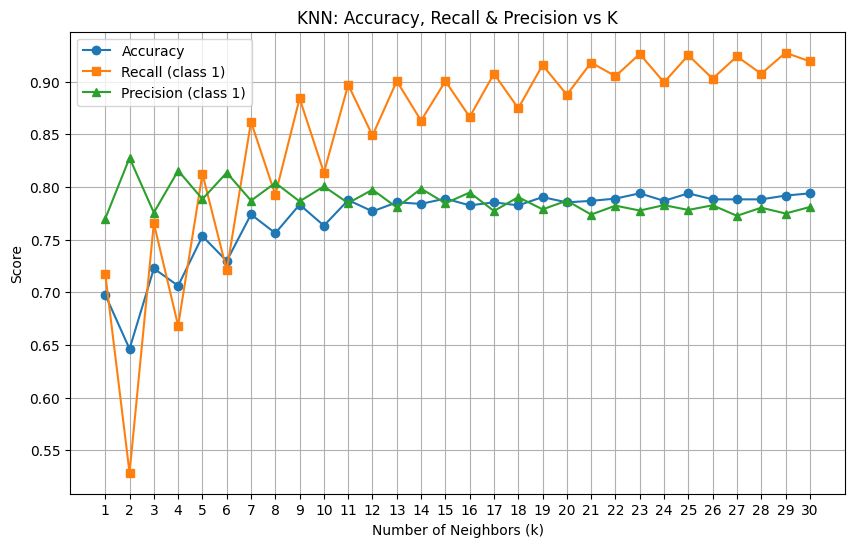

In [239]:
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_list, marker='o', label='Accuracy')
plt.plot(k_values, recall_list, marker='s', label='Recall (class 1)')
plt.plot(k_values, precision_list, marker='^', label='Precision (class 1)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN: Accuracy, Recall & Precision vs K')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [240]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: " , accuracy_score(y_test, y_pred))
print("Recall: " , recall_score(y_test, y_pred))   
print("precision: " , precision_score(y_test, y_pred))#

Accuracy:  0.7560627674750356
Recall:  0.7924970691676436
precision:  0.8038049940546967
